#### Assigment 1

** Metadata **
0    age             int64 
 1   workclass       object
 2   fnlwgt          int64 
 3   education       object
 4   education-num   int64 
 5   marital-status  object
 6   occupation      object
 7   relationship    object
 8   race            object
 9   sex             object
 10  capital-gain    int64 
 11  capital-loss    int64 
 12  hours-per-week  int64 
 13  native-country  object
 14  salary          object   >50K, <=50K


In [162]:
import pandas as pd
import numpy as np
import seaborn as sns

In [163]:
data = pd.read_csv('data/adult.data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [164]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [165]:
#How many men and women(sex Features) are representend in this set?
data["sex"].value_counts() #normalize=True)

Male      21790
Female    10771
Name: sex, dtype: int64

In [166]:
#What is the avarage/mean age of women?
data[data["sex"] == "Female"]["age"].mean()

36.85823043357163

In [167]:
#What is the precentage of German citizens (native-country feature)
data[data["native-country"] == "Germany"].count()
#data["native-country"].value_counts()

age               137
workclass         137
fnlwgt            137
education         137
education-num     137
marital-status    137
occupation        137
relationship      137
race              137
sex               137
capital-gain      137
capital-loss      137
hours-per-week    137
native-country    137
salary            137
dtype: int64

In [168]:
data["native-country"].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [169]:
#What are the mean and standard devation(std) of age for those who earn more than 50k pre year(salary) and those who earn less than 50K pre year?

data[data["salary"]==">50K"]["age"].describe()
#data[data["salary"]=="<=50K"]["age"].describe()


count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

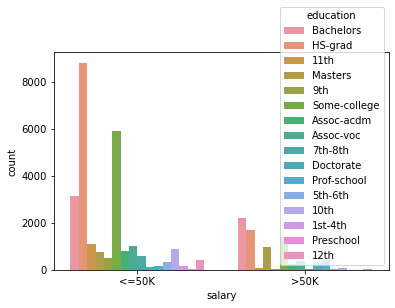

In [174]:
#Is it true that people who earn more than 50K have at least high school education/

pd.crosstab(data["education"], data["salary"])
sns.countplot(x="salary", hue="education", data=data);


In [188]:
#Display age statistics for each race(race) and each gender(sex). 
#Find the max age of men of Amer-Indian-Eskimo race?

columns_to_show = ["age"]
data.groupby(["sex", "race"])[columns_to_show].describe()

age                                          \
                             count       mean        std   min   25%   50%   
sex    race                                                                  
Female Amer-Indian-Eskimo    119.0  37.117647  13.114991  17.0  27.0  36.0   
       Asian-Pac-Islander    346.0  35.089595  12.300845  17.0  25.0  33.0   
       Black                1555.0  37.854019  12.637197  17.0  28.0  37.0   
       Other                 109.0  31.678899  11.631599  17.0  23.0  29.0   
       White                8642.0  36.811618  14.329093  17.0  25.0  35.0   
Male   Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0   
       Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0   
       Black                1569.0  37.682600  12.882612  17.0  27.0  36.0   
       Other                 162.0  34.654321  11.355531  17.0  26.0  32.0   
       White               19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                        
                             75%   max  
sex    race                             
Female Amer-Indian-Eskimo  46.00  80.0  
       Asian-Pac-Islander  43.75  75.0  
       Black               46.00  90.0  
       Other               39.00  74.0  
       White               46.00  90.0  
Male   Amer-Indian-Eskimo  45.00  82.0  
       Asian-Pac-Islander  46.00  90.0  
       Black               46.00  90.0  
       Other               42.00  77.0  
       White               49.00  90.0

In [180]:
#Among whom is the proportion of those who a lot (>50K) greater:merried or single men(maritel-status)?
#Consider as married those who have a marital_status (Married-civ-spouse, Married-spouse-absent od Married-AF-spouse), the rest are considered bechelors(single)

#data.groupby(["salary", "marital-status"])["salary"].count()
pd.crosstab(data["marital-status"], data["salary"])
#sns.countplot(hue="marital-status", hue="salary", data=data);

salary,<=50K,>50K
marital-status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


In [182]:
only_married = data['marital-status'].str.contains("Married")
pd.crosstab(data['salary'], only_married, )

marital-status,False,True
salary,,
<=50K,16039,8681
>50K,1105,6736


In [220]:
#What is the maximum number of hours a person works pre week(hours-pre-week).
#How many people work such a number of hours, and what is the percentage of those who earn a lot among them?

data["hours-per-week"].max()

people_work_maxhours = data["hours-per-week"] == data["hours-per-week"].max()
people_work_maxhours.value_counts()

data[people_work_maxhours]["salary"].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [244]:
#count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country(native-country).
#What will these be for Japan

data.groupby(["salary", "native-country"])["hours-per-week"].mean()

data[data["native-country"] == "Japan"].groupby("salary")["hours-per-week"].mean()

salary
<=50K    41.000000
>50K     47.958333
Name: hours-per-week, dtype: float64